# Load datasets

In [34]:
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import kaggle
import boto3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", None)

Set the s3 credentials

In [35]:
session = boto3.Session(profile_name="ck")
s3 = session.client("s3")

In [38]:
# Define the S3 bucket and prefix
bucket_name = "cryptokaizen-data-test"
s3_object_key = "kaizen-ai/datasets/football/european-football/database.sqlite"

# Define the local path to save the file
local_path = "datasets/football/european-football"
os.makedirs(local_path, exist_ok=True)
database_path = os.path.join(local_path, "database.sqlite")


# Function to download file from S3
def download_file_from_s3(bucket, key, local_file_path):
    try:
        print(f"Downloading {key} to {local_file_path}")
        s3.download_file(bucket, key, local_file_path)
    except Exception as e:
        print(f"Error occurred: {e}")


# Call the function to download the file
download_file_from_s3(bucket_name, s3_object_key, database_path)

# Connect to the downloaded SQLite database
conn = sqlite3.connect(database_path)
tables = pd.read_sql(
    """SELECT *
                        FROM sqlite_master
                        WHERE type='table';""",
    conn,
)
print(tables)

# Load the datasets into pandas dataframes
dataframes = {}
for idx, name in enumerate(tables["name"]):
    if name.lower() != "sqlite_sequence":
        file = name.lower() + "_df"
        if file != "_df":
            query = f"SELECT * FROM {name}"
            df = pd.read_sql(query, conn)
            exec(f"{file} = df.copy()")
            print(file, df.shape)
            df = df.drop_duplicates()
            dataframes[file] = df

print("Data imported")

    type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7  CREATE TABLE `Te

In [37]:
# Define the S3 bucket and prefix
bucket_name = "cryptokaizen-data-test"
prefix = "kaizen-ai/datasets/football/player-scores/"

# Define the local directory to save the files
local_directory = "datasets/football/player-scores"
os.makedirs(local_directory, exist_ok=True)


# Function to download files from S3
def download_files_from_s3(bucket, prefix, local_dir):
    try:
        response = s3.list_objects_v2(Bucket=bucket, Prefix=prefix)
        if "Contents" not in response:
            print(f"No files found at s3://{bucket}/{prefix}")
            return
        for obj in response["Contents"]:
            key = obj["Key"]
            if key.endswith(".csv"):
                local_file_path = os.path.join(local_dir, os.path.basename(key))
                print(f"Downloading {key} to {local_file_path}")
                s3.download_file(bucket, key, local_file_path)
    except Exception as e:
        print(f"Error occurred: {e}")


# Call the function to download the files
download_files_from_s3(bucket_name, prefix, local_directory)

# Load the datasets into pandas dataframes
dataframes_2 = {}
for dirname, _, filenames in os.walk(local_directory):
    for filename in filenames:
        if filename.endswith(".csv"):
            file = filename.split(".")[0] + "_df"
            filepath = os.path.join(dirname, filename)
            print(f"Loading {filepath}")
            df = pd.read_csv(filepath, sep=",", encoding="UTF-8")
            exec(f"{file} = df.copy()")
            print(file, df.shape)
            df = df.drop_duplicates()
            dataframes_2[file] = df

print("Data imported")

Loading datasets/football/player-scores/club_games.csv
club_games_df (135928, 11)
Loading datasets/football/player-scores/players.csv
players_df (30516, 23)
Loading datasets/football/player-scores/games.csv
games_df (67964, 23)
Loading datasets/football/player-scores/game_lineups.csv
game_lineups_df (2191911, 10)
Loading datasets/football/player-scores/competitions.csv
competitions_df (43, 11)
Loading datasets/football/player-scores/appearances.csv
appearances_df (1573079, 13)
Loading datasets/football/player-scores/player_valuations.csv
player_valuations_df (467132, 5)
Loading datasets/football/player-scores/clubs.csv
clubs_df (426, 17)
Loading datasets/football/player-scores/game_events.csv
game_events_df (734047, 10)
Data imported


In [36]:
# Define the S3 bucket and prefix
bucket_name = "cryptokaizen-data-test"
prefix = "kaizen-ai/datasets/football/player_attributes/"

# Define the local directory to save the files
local_directory = "datasets/football/player_attributes"
os.makedirs(local_directory, exist_ok=True)


# Function to download files from S3
def download_files_from_s3(bucket, prefix, local_dir):
    try:
        response = s3.list_objects_v2(Bucket=bucket, Prefix=prefix)
        if "Contents" not in response:
            print(f"No files found at s3://{bucket}/{prefix}")
            return
        for obj in response["Contents"]:
            key = obj["Key"]
            if key.endswith(".csv"):
                local_file_path = os.path.join(local_dir, os.path.basename(key))
                print(f"Downloading {key} to {local_file_path}")
                s3.download_file(bucket, key, local_file_path)
    except Exception as e:
        print(f"Error occurred: {e}")


# Call the function to download the files
download_files_from_s3(bucket_name, prefix, local_directory)

# Load the datasets into pandas dataframes
dataframes_3 = {}
for dirname, _, filenames in os.walk(local_directory):
    for filename in filenames:
        if filename.endswith(".csv"):
            file = filename.split(".")[0] + "_df"
            filepath = os.path.join(dirname, filename)
            print(f"Loading {filepath}")
            df = pd.read_csv(filepath, sep=";", encoding="UTF-8")
            exec(f"{file} = df.copy()")
            print(file, df.shape)
            df = df.drop_duplicates()
            dataframes_3[file] = df

print("Data imported")

Loading datasets/football/player_attributes/fifa13.csv
fifa13_df (15686, 48)
Loading datasets/football/player_attributes/fifa17.csv
fifa17_df (15656, 48)
Loading datasets/football/player_attributes/fifa06.csv
fifa06_df (10151, 37)
Loading datasets/football/player_attributes/fifa18.csv
fifa18_df (19126, 48)
Loading datasets/football/player_attributes/fifa10.csv
fifa10_df (14975, 37)
Loading datasets/football/player_attributes/fifa20.csv
fifa20_df (20527, 48)
Loading datasets/football/player_attributes/fifa11.csv
fifa11_df (15020, 48)
Loading datasets/football/player_attributes/fifa05.csv
fifa05_df (10970, 37)
Loading datasets/football/player_attributes/fifa19.csv
fifa19_df (19128, 48)
Loading datasets/football/player_attributes/fifa14.csv
fifa14_df (17270, 48)
Loading datasets/football/player_attributes/fifa16.csv
fifa16_df (13507, 48)
Loading datasets/football/player_attributes/fifa09.csv
fifa09_df (14800, 37)
Loading datasets/football/player_attributes/fifa15.csv
fifa15_df (17047, 48)

## Create a master_player (for all player_attributes each season against year) and master_games to capture the details of individual games

In [7]:
# Iterate over the dictionary.
all_data = []
for key, df in dataframes_3.items():
    # Extract year from the key.
    df["year"] = int("20" + key[-5:-3])
    dataframes_3[key] = df
    all_data.append(df)
for i in range(3):
    df["year"] = 2022 + i
    all_data.append(df)
master_player = pd.concat(all_data, ignore_index=True)
# Drop the columns with NaN values.
master_player = master_player.dropna(axis=1)
# Create a master_games df.
master_games = games_df

Determine home win in `home_win`. When the value is `1`, home club won, value is `0` home club lost and `-1` in case of a draw

In [8]:
# Create 'home_win' column
def determine_home_win(row):
    if row["home_club_goals"] > row["away_club_goals"]:
        return 1
    elif row["home_club_goals"] < row["away_club_goals"]:
        return 0
    else:
        return -1


master_games["home_win"] = master_games.apply(determine_home_win, axis=1)
master_games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,home_win
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league,1
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league,0
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,1.0,Michael Wiesinger,Jürgen Klopp,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league,-1
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,6.0,Jos Luhukay,Jens Keller,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league,0
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,9.0,Bert van Marwijk,Thomas Tuchel,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league,0


Merge the player statistics for each player in the game_lineups_df and tag the top 1% potential players as impact_players

In [9]:
# Step 1: Extract year from the date column in game_lineups_df.
game_lineups_df["year"] = pd.to_datetime(game_lineups_df["date"]).dt.year
# Step 2: Calculate the top 1% threshold for potential rating each year
thresholds = (
    master_player.groupby("year")["potential_rating"].quantile(0.99).reset_index()
)
thresholds = thresholds.rename(columns={"potential_rating": "threshold"})

# Step 3: Merge the thresholds back to the master_player dataframe
master_player = pd.merge(master_player, thresholds, on="year", how="left")

# Step 4: Tag impact players
master_player["impact_player"] = (
    master_player["potential_rating"] >= master_player["threshold"]
)

# Step 5: Merge the tagged master_player dataframe with game_lineups_df
lineups_master = pd.merge(
    game_lineups_df,
    master_player,
    left_on=["player_name", "year"],
    right_on=["Fullname", "year"],
    how="left",
)

# Output the merged dataframe
lineups_master.head()

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain,year,id,Fullname,current_rating,potential_rating,height,weight,preferred_foot,birth_date,weak_foot,ball_control,dribbling,marking,aggression,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,heading,shot_power,finishing,long_shots,gk_positioning,gk_diving,threshold,impact_player
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0,2013,45763,Christian Poulsen,76.0,76.0,181.0,76,Right,28/02/1980,3.0,74.0,62.0,68.0,85.0,52.0,78.0,74.0,47.0,71.0,74.0,62.0,68.0,42.0,66.0,63.0,9.0,12.0,85.0,False
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0,2013,172862,Niklas Moisander,76.0,76.0,182.0,75,Left,29/09/1985,4.0,75.0,66.0,76.0,73.0,55.0,77.0,76.0,67.0,74.0,72.0,65.0,67.0,39.0,44.0,55.0,10.0,8.0,85.0,False
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0,2013,156544,Maarten Martens,75.0,75.0,176.0,66,Left,02/07/1984,4.0,83.0,72.0,23.0,46.0,72.0,75.0,69.0,72.0,75.0,48.0,80.0,70.0,67.0,68.0,76.0,10.0,14.0,85.0,False
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0,2013,190815,Daley Blind,74.0,77.0,180.0,72,Left,09/03/1990,4.0,75.0,71.0,71.0,74.0,70.0,76.0,72.0,68.0,84.0,73.0,72.0,68.0,41.0,44.0,62.0,11.0,8.0,85.0,False
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0,2013,169978,Roy Beerens,72.0,74.0,173.0,62,Right,22/12/1987,5.0,74.0,77.0,28.0,58.0,70.0,64.0,54.0,83.0,72.0,40.0,83.0,73.0,65.0,65.0,74.0,8.0,10.0,85.0,False


Impute missing values for player by position and then knn imputation to finetune the values

In [10]:
# Define skill columns
skill_columns = [
    "current_rating",
    "potential_rating",
    "ball_control",
    "dribbling",
    "marking",
    "aggression",
    "composure",
    "crossing",
    "short_pass",
    "long_pass",
    "acceleration",
    "stamina",
    "strength",
    "heading",
    "shot_power",
    "finishing",
    "long_shots",
    "gk_positioning",
    "gk_diving",
]

# Save the indices of the originally missing values
missing_indices = {col: lineups_master[col].isna() for col in skill_columns}

# Group by player position and impute missing values with group mean
lineups_master_grouped = lineups_master.groupby("position")

# Apply group-based imputation
for col in skill_columns:
    lineups_master[col] = lineups_master_grouped[col].transform(
        lambda x: x.fillna(x.mean())
    )

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer to skill columns
knn_imputed_data = knn_imputer.fit_transform(lineups_master[skill_columns])

# Update only the originally missing values with KNN imputed values
for col in skill_columns:
    lineups_master.loc[missing_indices[col], col] = knn_imputed_data[
        missing_indices[col], skill_columns.index(col)
    ]
print("Missing values after KNN imputation:")
print(lineups_master[skill_columns].isnull().sum())
lineups_master.head()

Missing values after KNN imputation:
current_rating      0
potential_rating    0
ball_control        0
dribbling           0
marking             0
aggression          0
composure           0
crossing            0
short_pass          0
long_pass           0
acceleration        0
stamina             0
strength            0
heading             0
shot_power          0
finishing           0
long_shots          0
gk_positioning      0
gk_diving           0
dtype: int64


,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain,year,id,Fullname,current_rating,potential_rating,height,weight,preferred_foot,birth_date,weak_foot,ball_control,dribbling,marking,aggression,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,heading,shot_power,finishing,long_shots,gk_positioning,gk_diving,threshold,impact_player
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0,2013,45763,Christian Poulsen,76.0,76.0,181.0,76,Right,28/02/1980,3.0,74.0,62.0,68.0,85.0,52.0,78.0,74.0,47.0,71.0,74.0,62.0,68.0,42.0,66.0,63.0,9.0,12.0,85.0,False
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0,2013,172862,Niklas Moisander,76.0,76.0,182.0,75,Left,29/09/1985,4.0,75.0,66.0,76.0,73.0,55.0,77.0,76.0,67.0,74.0,72.0,65.0,67.0,39.0,44.0,55.0,10.0,8.0,85.0,False
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0,2013,156544,Maarten Martens,75.0,75.0,176.0,66,Left,02/07/1984,4.0,83.0,72.0,23.0,46.0,72.0,75.0,69.0,72.0,75.0,48.0,80.0,70.0,67.0,68.0,76.0,10.0,14.0,85.0,False
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0,2013,190815,Daley Blind,74.0,77.0,180.0,72,Left,09/03/1990,4.0,75.0,71.0,71.0,74.0,70.0,76.0,72.0,68.0,84.0,73.0,72.0,68.0,41.0,44.0,62.0,11.0,8.0,85.0,False
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0,2013,169978,Roy Beerens,72.0,74.0,173.0,62,Right,22/12/1987,5.0,74.0,77.0,28.0,58.0,70.0,64.0,54.0,83.0,72.0,40.0,83.0,73.0,65.0,65.0,74.0,8.0,10.0,85.0,False


Create an aggregated skill dataframe for each team of each match. Impact players are given most weightage, captains second most. If a player is both captain and impact, then multiplicative weights are used.

In [11]:
# Define weights
impact_weight = 1.5
captain_weight = 1.2

# Combine weights (multiplicative approach)
lineups_master["weight"] = 1
lineups_master["weight"] *= lineups_master["impact_player"].apply(
    lambda x: impact_weight if x else 1
)
lineups_master["weight"] *= lineups_master["team_captain"].apply(
    lambda x: captain_weight if x else 1
)

# List of skill columns
skill_columns = [
    "ball_control",
    "dribbling",
    "marking",
    "aggression",
    "composure",
    "crossing",
    "short_pass",
    "long_pass",
    "acceleration",
    "stamina",
    "strength",
    "heading",
    "shot_power",
    "finishing",
    "long_shots",
    "gk_positioning",
    "gk_diving",
]

# Apply weights to skill columns
for col in skill_columns:
    lineups_master[col + "_weighted"] = (
        lineups_master[col] * lineups_master["weight"]
    )

# Aggregate weighted skill columns by game_id and club_id
aggregate_lineups_master = (
    lineups_master.groupby(["game_id", "club_id"])
    .apply(
        lambda x: pd.Series(
            {
                col: (x[col + "_weighted"].sum() / x["weight"].sum())
                for col in skill_columns
            }
        )
    )
    .reset_index()
)

aggregate_lineups_master.head()

,game_id,club_id,ball_control,dribbling,marking,aggression,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,heading,shot_power,finishing,long_shots,gk_positioning,gk_diving
0,2317258,610,70.675217,65.820218,45.511524,55.603878,58.497295,67.813460,64.001385,70.439265,69.978987,64.951091,67.859465,63.792581,52.399085,55.096955,56.656145,16.944136,16.529571
1,2317258,1090,64.384615,60.714286,44.659341,57.461538,54.340659,63.901099,59.538462,68.197802,70.439560,65.329670,65.681319,66.923077,49.912088,56.241758,52.923077,16.670330,16.296703
2,2320446,27,74.018306,70.093350,47.614378,58.307408,64.096479,71.854084,66.018463,74.749959,72.469688,67.787895,71.847093,69.385308,58.472374,61.417836,64.032486,16.220922,15.416364
3,2320446,5560,63.466871,59.631335,50.624389,60.960147,60.696530,57.359636,61.567091,61.472166,66.482555,67.217308,66.658649,58.286665,56.902029,49.893963,51.668736,16.908208,16.849165
4,2320447,16,69.516396,65.595361,45.871886,58.856443,60.051216,69.963887,62.945508,69.760898,70.336237,69.152669,66.210672,68.488188,57.842631,58.909837,57.960126,16.949530,15.736643


Calculate aggregate skill score for each team in each match.

In [12]:
# Define weights for each skill
weights = {
    "ball_control": 1,
    "dribbling": 1.2,
    "marking": 0.8,
    "aggression": 0.9,
    "composure": 1,
    "crossing": 1,
    "short_pass": 1,
    "long_pass": 1,
    "acceleration": 1,
    "stamina": 1,
    "strength": 0.8,
    "heading": 0.8,
    "shot_power": 1.2,
    "finishing": 1.2,
    "long_shots": 1,
    "gk_positioning": 0.5,
    "gk_diving": 0.5,
}


# Calculate weighted average for each row
def calculate_weighted_average(row, weights):
    total_weight = sum(weights.values())
    weighted_sum = sum(row[col] * weights[col] for col in weights)
    return weighted_sum / total_weight


aggregate_lineups_master[
    "aggregate_skill_score"
] = aggregate_lineups_master.apply(
    calculate_weighted_average, axis=1, weights=weights
)
aggregate_lineups_master.head()

,game_id,club_id,ball_control,dribbling,marking,aggression,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,heading,shot_power,finishing,long_shots,gk_positioning,gk_diving,aggregate_skill_score
0,2317258,610,70.675217,65.820218,45.511524,55.603878,58.497295,67.813460,64.001385,70.439265,69.978987,64.951091,67.859465,63.792581,52.399085,55.096955,56.656145,16.944136,16.529571,59.088274
1,2317258,1090,64.384615,60.714286,44.659341,57.461538,54.340659,63.901099,59.538462,68.197802,70.439560,65.329670,65.681319,66.923077,49.912088,56.241758,52.923077,16.670330,16.296703,57.189094
2,2320446,27,74.018306,70.093350,47.614378,58.307408,64.096479,71.854084,66.018463,74.749959,72.469688,67.787895,71.847093,69.385308,58.472374,61.417836,64.032486,16.220922,15.416364,63.042790
3,2320446,5560,63.466871,59.631335,50.624389,60.960147,60.696530,57.359636,61.567091,61.472166,66.482555,67.217308,66.658649,58.286665,56.902029,49.893963,51.668736,16.908208,16.849165,56.719639
4,2320447,16,69.516396,65.595361,45.871886,58.856443,60.051216,69.963887,62.945508,69.760898,70.336237,69.152669,66.210672,68.488188,57.842631,58.909837,57.960126,16.949530,15.736643,60.520429


Merge the aggregate skill information with master_games

In [13]:
# Separate home and away teams in aggregate_lineups_master
home_skills = aggregate_lineups_master.rename(
    columns=lambda x: "home_" + x if x not in ["game_id", "club_id"] else x
)
away_skills = aggregate_lineups_master.rename(
    columns=lambda x: "away_" + x if x not in ["game_id", "club_id"] else x
)

# Merge home and away skills with master_games
merged_df = pd.merge(
    master_games,
    home_skills,
    left_on=["game_id", "home_club_id"],
    right_on=["game_id", "club_id"],
    how="left",
)
merged_df = pd.merge(
    merged_df,
    away_skills,
    left_on=["game_id", "away_club_id"],
    right_on=["game_id", "club_id"],
    how="left",
)

# Drop duplicate columns
merged_master = merged_df.drop(columns=["club_id_x", "club_id_y"])

merged_master.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,home_win,home_ball_control,home_dribbling,home_marking,home_aggression,home_composure,home_crossing,home_short_pass,home_long_pass,home_acceleration,home_stamina,home_strength,home_heading,home_shot_power,home_finishing,home_long_shots,home_gk_positioning,home_gk_diving,home_aggregate_skill_score,away_ball_control,away_dribbling,away_marking,away_aggression,away_composure,away_crossing,away_short_pass,away_long_pass,away_acceleration,away_stamina,away_strength,away_heading,away_shot_power,away_finishing,away_long_shots,away_gk_positioning,away_gk_diving,away_aggregate_skill_score
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league,1,67.784435,63.221928,45.454839,58.469476,58.587050,66.913902,61.346169,67.809733,68.701865,68.711139,64.975342,66.524576,57.904682,56.208067,55.537977,17.656246,15.977413,59.068997,62.109890,57.912088,47.813187,60.824176,55.175824,62.395604,53.901099,68.637363,71.010989,70.131868,64.395604,64.219780,48.406593,52.560440,54.406593,16.318681,15.230769,56.609026
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league,0,61.780220,58.021978,48.472527,61.813187,54.626374,62.945055,55.659341,70.560440,72.219780,68.153846,68.901099,64.714286,49.285714,53.659341,57.813187,16.263736,15.065934,57.477089,65.915796,61.428233,50.628886,63.803826,59.713784,64.839373,60.487492,65.101579,70.536282,68.929931,66.865927,64.343108,52.606791,52.744665,50.885004,19.442230,17.522378,58.359808
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,1.0,Michael Wiesinger,Jürgen Klopp,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league,-1,63.133379,57.590335,45.910705,65.359724,54.693152,61.150457,55.002016,64.198660,67.257204,71.520191,61.246211,63.763819,47.758924,51.953426,49.387516,16.677972,16.417133,55.799603,66.894518,62.935921,42.697632,58.208841,57.707425,65.545249,59.244923,69.196754,67.376868,67.864240,65.301811,65.891532,56.956991,55.175437,53.871888,17.394795,16.196303,58.244036
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,6.0,Jos Luhukay,Jens Keller,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league,0,66.671262,62.277629,47.891780,59.700350,58.116803,65.847761,59.793769,68.572836,67.480095,66.831751,66.492872,61.171680,49.428207,49.699276,53.247058,17.176034,15.710464,57.287176,67.673963,64.052350,53.546128,67.816197,60.377852,67.800037,62.857247,68.583197,71.748800,73.562430,59.065501,68.348948,52.272587,55.244765,55.460929,16.994027,16.073649,60.143709
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,9.0,Bert van Marwijk,Thomas Tuchel,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league,0,64.561479,59.948964,47.361378,58.867611,56.588317,60.994257,59.712426,63.975928,65.874927,69.338796,61.947375,61.732598,52.403826,50.496962,52.885891,16.636323,17.075784,56.353566,63.924395,59.929000,49.729123,61.589396,56.492757,63.893426,60.720137,64.418361,66.719639,67.683005,65.565251,62.466368,51.209451,51.222379,49.922851,16.227047,15.721237,56.74

In [15]:
# Helper function to calculate normalized performance metrics
def calculate_performance(
    df, club_id_col, goals_for_col, goals_against_col, win_col
):
    df["goal_diff"] = df[goals_for_col] - df[goals_against_col]
    df["win"] = df[win_col].astype(int)

    df["goals_scored"] = (
        df.groupby(club_id_col)[goals_for_col]
        .rolling(10, min_periods=1)
        .sum()
        .reset_index(level=0, drop=True)
    )
    df["goals_conceded"] = (
        df.groupby(club_id_col)[goals_against_col]
        .rolling(10, min_periods=1)
        .sum()
        .reset_index(level=0, drop=True)
    )
    df["wins"] = (
        df.groupby(club_id_col)["win"]
        .rolling(10, min_periods=1)
        .sum()
        .reset_index(level=0, drop=True)
    )
    df["goal_diff_sum"] = (
        df.groupby(club_id_col)["goal_diff"]
        .rolling(10, min_periods=1)
        .sum()
        .reset_index(level=0, drop=True)
    )

    max_goals_scored = df["goals_scored"].max()
    max_goals_conceded = df["goals_conceded"].max()
    max_wins = df["wins"].max()
    max_goal_diff = df["goal_diff_sum"].max()

    df["goals_scored_norm"] = (
        df["goals_scored"] / max_goals_scored if max_goals_scored != 0 else 0
    )
    df["goals_conceded_norm"] = (
        df["goals_conceded"] / max_goals_conceded
        if max_goals_conceded != 0
        else 0
    )
    df["wins_norm"] = df["wins"] / max_wins if max_wins != 0 else 0
    df["goal_diff_norm"] = (
        df["goal_diff_sum"] / max_goal_diff if max_goal_diff != 0 else 0
    )

    df["performance_score"] = (
        (df["goals_scored_norm"] * 0.4)
        + (df["wins_norm"] * 0.3)
        + (df["goal_diff_norm"] * 0.2)
        - (df["goals_conceded_norm"] * 0.1)
    )
    return df


# Calculate home and away performance scores
home_performance = calculate_performance(
    merged_master.copy(),
    "home_club_id",
    "home_club_goals",
    "away_club_goals",
    "home_win",
)
away_performance = calculate_performance(
    merged_master.copy(),
    "away_club_id",
    "away_club_goals",
    "home_club_goals",
    "home_win",
)

# Merge the performance scores back into the original dataframe
merged_master["home_aggregate_performance"] = home_performance[
    "performance_score"
]
merged_master["away_aggregate_performance"] = away_performance[
    "performance_score"
]
merged_master.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,home_win,home_ball_control,home_dribbling,home_marking,home_aggression,home_composure,home_crossing,home_short_pass,home_long_pass,home_acceleration,home_stamina,home_strength,home_heading,home_shot_power,home_finishing,home_long_shots,home_gk_positioning,home_gk_diving,home_aggregate_skill_score,away_ball_control,away_dribbling,away_marking,away_aggression,away_composure,away_crossing,away_short_pass,away_long_pass,away_acceleration,away_stamina,away_strength,away_heading,away_shot_power,away_finishing,away_long_shots,away_gk_positioning,away_gk_diving,away_aggregate_skill_score,home_aggregate_performance,away_aggregate_performance
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,15.0,Jürgen Klopp,Torsten Lieberknecht,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league,1,67.784435,63.221928,45.454839,58.469476,58.587050,66.913902,61.346169,67.809733,68.701865,68.711139,64.975342,66.524576,57.904682,56.208067,55.537977,17.656246,15.977413,59.068997,62.109890,57.912088,47.813187,60.824176,55.175824,62.395604,53.901099,68.637363,71.010989,70.131868,64.395604,64.219780,48.406593,52.560440,54.406593,16.318681,15.230769,56.609026,0.050080,0.028134
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,11.0,Torsten Lieberknecht,Armin Veh,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league,0,61.780220,58.021978,48.472527,61.813187,54.626374,62.945055,55.659341,70.560440,72.219780,68.153846,68.901099,64.714286,49.285714,53.659341,57.813187,16.263736,15.065934,57.477089,65.915796,61.428233,50.628886,63.803826,59.713784,64.839373,60.487492,65.101579,70.536282,68.929931,66.865927,64.343108,52.606791,52.744665,50.885004,19.442230,17.522378,58.359808,-0.015134,0.024618
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,1.0,Michael Wiesinger,Jürgen Klopp,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league,-1,63.133379,57.590335,45.910705,65.359724,54.693152,61.150457,55.002016,64.198660,67.257204,71.520191,61.246211,63.763819,47.758924,51.953426,49.387516,16.677972,16.417133,55.799603,66.894518,62.935921,42.697632,58.208841,57.707425,65.545249,59.244923,69.196754,67.376868,67.864240,65.301811,65.891532,56.956991,55.175437,53.871888,17.394795,16.196303,58.244036,-0.023743,-0.024778
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,6.0,Jos Luhukay,Jens Keller,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league,0,66.671262,62.277629,47.891780,59.700350,58.116803,65.847761,59.793769,68.572836,67.480095,66.831751,66.492872,61.171680,49.428207,49.699276,53.247058,17.176034,15.710464,57.287176,67.673963,64.052350,53.546128,67.816197,60.377852,67.800037,62.857247,68.583197,71.748800,73.562430,59.065501,68.348948,52.272587,55.244765,55.460929,16.994027,16.073649,60.143709,-0.015134,0.024618
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,9.0,Bert van Marwijk,Thomas Tuchel,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league,0,64.561479,59.948964,47.361378,58.867611,56.588317,60.994257,59.712426,63.975928,65.874927,69.338796,61.947375,61.732598,52.403826,50.496962,52.885891,16.636323,17.075784,56.353566,63.924395,59.929000,49.729123,61.589396,56.49

In [16]:
df_safe = merged_master.copy()

Calculate manager win scores.

In [17]:
# Calculate the number of games and wins for each manager
manager_game_counts = merged_master["home_club_manager_name"].value_counts()
manager_wins = merged_master[merged_master["home_win"] == 1][
    "home_club_manager_name"
].value_counts()

# Define prior parameters for the Beta distribution
alpha_prior = 2
beta_prior = 2

# Calculate Bayesian win probability for each manager
manager_scores = {}
for manager in manager_game_counts.index:
    wins = manager_wins.get(manager, 0)
    games = manager_game_counts[manager]
    alpha_post = alpha_prior + wins
    beta_post = beta_prior + games - wins
    win_prob = alpha_post / (alpha_post + beta_post)
    manager_scores[manager] = win_prob

# Add win scores to the merged_master dataset
merged_master["home_manager_score"] = merged_master[
    "home_club_manager_name"
].apply(lambda x: manager_scores.get(x, 0))
merged_master["away_manager_score"] = merged_master[
    "away_club_manager_name"
].apply(lambda x: manager_scores.get(x, 0))


# Top 10 managers by win score
top_10_managers = sorted(
    manager_scores.items(), key=lambda x: x[1], reverse=True
)[:10]
top_10_managers_df = pd.DataFrame(
    top_10_managers, columns=["Manager", "Win Score"]
)

In [18]:
# Sort the DataFrame by date
merged_master = merged_master.sort_values(by="date")

# Define prior parameters for the Beta distribution
alpha_prior = 2
beta_prior = 2

# Initialize cumulative win counts and game counts for home and away managers
merged_master["home_cum_wins"] = (
    (merged_master["home_win"] == 1)
    .groupby(merged_master["home_club_manager_name"])
    .cumsum()
    .shift()
    .fillna(0)
)
merged_master["home_cum_games"] = (
    merged_master.groupby("home_club_manager_name").cumcount().shift().fillna(0)
)

merged_master["away_cum_wins"] = (
    (merged_master["home_win"] == 0)
    .groupby(merged_master["away_club_manager_name"])
    .cumsum()
    .shift()
    .fillna(0)
)
merged_master["away_cum_games"] = (
    merged_master.groupby("away_club_manager_name").cumcount().shift().fillna(0)
)

# Calculate Bayesian win probability for home managers
merged_master["home_alpha_post"] = alpha_prior + merged_master["home_cum_wins"]
merged_master["home_beta_post"] = (
    beta_prior + merged_master["home_cum_games"] - merged_master["home_cum_wins"]
)
merged_master["home_manager_score"] = merged_master["home_alpha_post"] / (
    merged_master["home_alpha_post"] + merged_master["home_beta_post"]
)

# Calculate Bayesian win probability for away managers
merged_master["away_alpha_post"] = alpha_prior + merged_master["away_cum_wins"]
merged_master["away_beta_post"] = (
    beta_prior + merged_master["away_cum_games"] - merged_master["away_cum_wins"]
)
merged_master["away_manager_score"] = merged_master["away_alpha_post"] / (
    merged_master["away_alpha_post"] + merged_master["away_beta_post"]
)

# Drop intermediate columns
merged_master = merged_master.drop(
    columns=[
        "home_cum_wins",
        "home_cum_games",
        "home_alpha_post",
        "home_beta_post",
        "away_cum_wins",
        "away_cum_games",
        "away_alpha_post",
        "away_beta_post",
    ]
)
merged_master.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,home_win,home_ball_control,home_dribbling,home_marking,home_aggression,home_composure,home_crossing,home_short_pass,home_long_pass,home_acceleration,home_stamina,home_strength,home_heading,home_shot_power,home_finishing,home_long_shots,home_gk_positioning,home_gk_diving,home_aggregate_skill_score,away_ball_control,away_dribbling,away_marking,away_aggression,away_composure,away_crossing,away_short_pass,away_long_pass,away_acceleration,away_stamina,away_strength,away_heading,away_shot_power,away_finishing,away_long_shots,away_gk_positioning,away_gk_diving,away_aggregate_skill_score,home_aggregate_performance,away_aggregate_performance,home_manager_score,away_manager_score
9271,2235764,ELQ,2012,First Round 1st leg,2012-07-03,1167,5594,0,0,NaN,NaN,Qatip Osmani,Ronnie McFall,Milano Arena,2000.0,Eitan Shmuelevic,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:0,international_cup,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244118,-0.030000,0.50,0.50
14618,2231979,CLQ,2012,First Round 1st leg,2012-07-03,3471,10532,0,0,NaN,NaN,David Jeffrey,Mikkjal Thomassen,Windsor Park,1341.0,Wim Smet,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:0,international_cup,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164038,0.048965,0.50,0.50
46710,2231982,CLQ,2012,First Round 1st leg,2012-07-03,6335,28958,8,0,NaN,NaN,Mark Miller,Vicens Marques,Tony Bezzina Stadium,1136.0,Johnny Casanova,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,8:0,international_cup,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.197942,0.001218,0.50,0.50
14623,2234412,ELQ,2012,First Round 1st leg,2012-07-03,24832,10694,0,6,NaN,NaN,Jógvan Martin Olsen,Oleg Kubarev,Gundadalur,650.0,Andris Treimanis,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:6,international_cup,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.060538,0.073854,0.75,0.50
42937,2231978,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,Didier Philippe,Stefano Ceci,Stade Jos Nosbaum,1070.0,Alan Mario Sant,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,7:0,international_cup,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020026,-0.032840,0.50,0.75


Head-to-head probability of winning.

In [19]:
# Sort the DataFrame by date
merged_master = merged_master.sort_values(by="date")
df_save = merged_master
# Initialize lists to store the calculated probabilities
home_head_head_probs = []

# Iterate through each game
for idx, row in merged_master.iterrows():
    # Filter games that happened before the current game
    past_games = merged_master[
        (merged_master["date"] < row["date"])
        & (
            (merged_master["home_club_id"] == row["home_club_id"])
            & (merged_master["away_club_id"] == row["away_club_id"])
            | (merged_master["home_club_id"] == row["away_club_id"])
            & (merged_master["away_club_id"] == row["home_club_id"])
        )
    ]

    # Total head-to-head matches before the current game
    total_matches = len(past_games)

    # Head-to-head wins for the home team before the current game
    home_wins = (
        past_games[
            (past_games["home_club_id"] == row["home_club_id"])
            & (past_games["home_win"] == 1)
        ].shape[0]
        + past_games[
            (past_games["away_club_id"] == row["home_club_id"])
            & (past_games["home_win"] == 0)
        ].shape[0]
    )

    # Calculate the head-to-head win probability for the home team
    home_head_head_prob = (
        home_wins / total_matches if total_matches > 0 else np.nan
    )

    # Append the calculated probability to the list
    home_head_head_probs.append(home_head_head_prob)

# Add the calculated probabilities as a new column in the DataFrame
merged_master["home_head_head_prob"] = home_head_head_probs
merged_master.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,home_win,home_ball_control,home_dribbling,home_marking,home_aggression,home_composure,home_crossing,home_short_pass,home_long_pass,home_acceleration,home_stamina,home_strength,home_heading,home_shot_power,home_finishing,home_long_shots,home_gk_positioning,home_gk_diving,home_aggregate_skill_score,away_ball_control,away_dribbling,away_marking,away_aggression,away_composure,away_crossing,away_short_pass,away_long_pass,away_acceleration,away_stamina,away_strength,away_heading,away_shot_power,away_finishing,away_long_shots,away_gk_positioning,away_gk_diving,away_aggregate_skill_score,home_aggregate_performance,away_aggregate_performance,home_manager_score,away_manager_score,home_head_head_prob
9271,2235764,ELQ,2012,First Round 1st leg,2012-07-03,1167,5594,0,0,NaN,NaN,Qatip Osmani,Ronnie McFall,Milano Arena,2000.0,Eitan Shmuelevic,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:0,international_cup,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244118,-0.030000,0.50,0.50,NaN
14618,2231979,CLQ,2012,First Round 1st leg,2012-07-03,3471,10532,0,0,NaN,NaN,David Jeffrey,Mikkjal Thomassen,Windsor Park,1341.0,Wim Smet,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:0,international_cup,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164038,0.048965,0.50,0.50,NaN
46710,2231982,CLQ,2012,First Round 1st leg,2012-07-03,6335,28958,8,0,NaN,NaN,Mark Miller,Vicens Marques,Tony Bezzina Stadium,1136.0,Johnny Casanova,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,8:0,international_cup,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.197942,0.001218,0.50,0.50,NaN
14623,2234412,ELQ,2012,First Round 1st leg,2012-07-03,24832,10694,0,6,NaN,NaN,Jógvan Martin Olsen,Oleg Kubarev,Gundadalur,650.0,Andris Treimanis,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,0:6,international_cup,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.060538,0.073854,0.75,0.50,NaN
42937,2231978,CLQ,2012,First Round 1st leg,2012-07-03,853,10747,7,0,NaN,NaN,Didier Philippe,Stefano Ceci,Stade Jos Nosbaum,1070.0,Alan Mario Sant,https://www.transfermarkt.co.uk/spielbericht/i...,NaN,NaN,NaN,NaN,7:0,international_cup,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020026,-0.032840,0.50,0.75,NaN


In [20]:
merged_master = merged_master.dropna(
    subset=["home_aggregate_skill_score", "away_aggregate_skill_score"]
)
merged_master["home_head_head_prob"] = merged_master[
    "home_head_head_prob"
].fillna(0)
merged_master

/tmp/ipykernel_338/26435301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_master['home_head_head_prob'] = merged_master['home_head_head_prob'].fillna(0)


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,home_win,home_ball_control,home_dribbling,home_marking,home_aggression,home_composure,home_crossing,home_short_pass,home_long_pass,home_acceleration,home_stamina,home_strength,home_heading,home_shot_power,home_finishing,home_long_shots,home_gk_positioning,home_gk_diving,home_aggregate_skill_score,away_ball_control,away_dribbling,away_marking,away_aggression,away_composure,away_crossing,away_short_pass,away_long_pass,away_acceleration,away_stamina,away_strength,away_heading,away_shot_power,away_finishing,away_long_shots,away_gk_positioning,away_gk_diving,away_aggregate_skill_score,home_aggregate_performance,away_aggregate_performance,home_manager_score,away_manager_score,home_head_head_prob
1759,2321964,ELQ,2013,First Round 1st leg,2013-07-02,7130,4414,0,3,NaN,NaN,Valeri Bondarenko,Per Olsson,A. Le Coq Arena,500.0,Boško Jovanetic,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-4-2,NaN,NaN,0:3,international_cup,0,63.707376,60.816313,46.466704,58.811479,60.766737,57.596809,60.807686,61.346754,67.485604,66.243204,66.136818,57.147777,57.793459,51.401578,52.651758,17.589137,17.592950,56.663016,53.911841,48.249321,47.329855,62.205671,44.738178,54.017254,49.813935,54.494230,65.463327,72.061191,52.792058,54.414600,41.414927,43.538020,45.592269,14.325405,14.931378,49.948280,-0.022702,0.036927,0.500000,0.750000,0.000000
16607,2321968,ELQ,2013,First Round 1st leg,2013-07-02,18506,10625,0,1,NaN,NaN,Srgjan Zaharievski,Qurban Qurbanov,Stadion Zelezarnica,250.0,Lars Christoffersen,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-5-1,NaN,NaN,0:1,international_cup,0,63.787989,60.252712,49.658867,60.924170,60.880670,57.554761,61.428915,61.402676,66.860833,67.393597,66.789114,58.568606,57.686837,50.968316,52.432157,16.799905,16.770296,56.984979,62.723816,59.291290,53.336747,62.118084,60.551145,58.045513,61.480243,62.978733,66.195454,67.765208,66.689890,57.361066,54.755340,47.676751,50.833830,16.679197,16.813057,56.553746,-0.015134,0.069962,0.500000,0.500000,0.000000
48709,2321974,ELQ,2013,First Round 1st leg,2013-07-02,329,8841,1,1,NaN,NaN,Alfonso Greco,John Toshack,Ta Qali,2500.0,Eiko Saar,https://www.transfermarkt.co.uk/spielbericht/i...,4-4-2 double 6,5-3-2,NaN,NaN,1:1,international_cup,-1,62.084205,57.851483,50.789547,60.411095,58.933624,56.654263,60.062037,61.352003,65.690192,66.665011,66.109095,56.535121,54.847264,48.313359,50.140729,17.287328,17.411813,55.676928,62.231448,58.762692,50.060960,59.896530,59.320131,56.489878,59.910838,61.537270,66.126921,67.035058,66.641486,57.825534,56.446794,48.907535,50.092264,16.816772,16.966655,55.981460,-0.047487,0.038577,0.750000,0.333333,0.000000
44910,2321957,CLQ,2013,First Round 1st leg,2013-07-02,4807,10747,3,0,NaN,NaN,Vardan Bichakhchyan,Marco Protti,Gyumri City Stadium,2000.0,Aleksandr Aliev,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-4-2 double 6,NaN,NaN,3:0,international_cup,1,63.833350,60.394472,49.683411,60.655799,60.865367,57.782926,61.606296,61.711318,67.201352,67.170520,66.478428,57.864760,57.258890,50.493039,52.179168,16.875854,16.855030,56.905844,61.444538,57.846472,47.062812,59.229994,58.886305,55.980539,59.101570,61.044652,65.720938,65.131211,66.301982,56.366472,54.087884,49.534411,51.030009,17.697150,17.132049,55.258421,0.125187,-0.024103,0.500000,0.500000,0.000000
9208,2321958,CLQ,2013,First Round 1st leg,2013-07-02,28958,10752,2,2,NaN,NaN,Carlos Sanchez,Rúni Nolsöe,Estadi Comunal,752.0,Damir Batinic,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-3-3 Attacking,NaN,NaN,2:2,international_cup,-1,64.011873,60.065278,50.981086,60.770815,59.812539,58.796254,60.540426,63.841507,65.490995,67.042383,66.969910,60.145116,55.788880,50.1749

Rest Days before match


In [21]:
# Ensure the date column is in datetime format
merged_master["date"] = pd.to_datetime(merged_master["date"])


# Function to calculate rest days for each team
def calculate_rest_days(data, team_column, date_column):
    data = data.sort_values(by=date_column)
    data["previous_date"] = data.groupby(team_column)[date_column].shift(1)
    data["rest_days"] = (data[date_column] - data["previous_date"]).dt.days
    data["rest_days"] = data["rest_days"].fillna(-1)
    return data.drop(columns=["previous_date"])


# Calculate rest days for home and away teams
merged_master = calculate_rest_days(merged_master, "home_club_id", "date")
merged_master = merged_master.rename(columns={"rest_days": "home_rest_days"})
merged_master = calculate_rest_days(merged_master, "away_club_id", "date")
merged_master = merged_master.rename(columns={"rest_days": "away_rest_days"})

merged_master

/tmp/ipykernel_338/260326749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_master['date'] = pd.to_datetime(merged_master['date'])


,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,home_win,home_ball_control,home_dribbling,home_marking,home_aggression,home_composure,home_crossing,home_short_pass,home_long_pass,home_acceleration,home_stamina,home_strength,home_heading,home_shot_power,home_finishing,home_long_shots,home_gk_positioning,home_gk_diving,home_aggregate_skill_score,away_ball_control,away_dribbling,away_marking,away_aggression,away_composure,away_crossing,away_short_pass,away_long_pass,away_acceleration,away_stamina,away_strength,away_heading,away_shot_power,away_finishing,away_long_shots,away_gk_positioning,away_gk_diving,away_aggregate_skill_score,home_aggregate_performance,away_aggregate_performance,home_manager_score,away_manager_score,home_head_head_prob,home_rest_days,away_rest_days
1759,2321964,ELQ,2013,First Round 1st leg,2013-07-02,7130,4414,0,3,NaN,NaN,Valeri Bondarenko,Per Olsson,A. Le Coq Arena,500.0,Boško Jovanetic,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-4-2,NaN,NaN,0:3,international_cup,0,63.707376,60.816313,46.466704,58.811479,60.766737,57.596809,60.807686,61.346754,67.485604,66.243204,66.136818,57.147777,57.793459,51.401578,52.651758,17.589137,17.592950,56.663016,53.911841,48.249321,47.329855,62.205671,44.738178,54.017254,49.813935,54.494230,65.463327,72.061191,52.792058,54.414600,41.414927,43.538020,45.592269,14.325405,14.931378,49.948280,-0.022702,0.036927,0.500000,0.750000,0.000000,-1.0,-1.0
16607,2321968,ELQ,2013,First Round 1st leg,2013-07-02,18506,10625,0,1,NaN,NaN,Srgjan Zaharievski,Qurban Qurbanov,Stadion Zelezarnica,250.0,Lars Christoffersen,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-5-1,NaN,NaN,0:1,international_cup,0,63.787989,60.252712,49.658867,60.924170,60.880670,57.554761,61.428915,61.402676,66.860833,67.393597,66.789114,58.568606,57.686837,50.968316,52.432157,16.799905,16.770296,56.984979,62.723816,59.291290,53.336747,62.118084,60.551145,58.045513,61.480243,62.978733,66.195454,67.765208,66.689890,57.361066,54.755340,47.676751,50.833830,16.679197,16.813057,56.553746,-0.015134,0.069962,0.500000,0.500000,0.000000,-1.0,-1.0
48709,2321974,ELQ,2013,First Round 1st leg,2013-07-02,329,8841,1,1,NaN,NaN,Alfonso Greco,John Toshack,Ta Qali,2500.0,Eiko Saar,https://www.transfermarkt.co.uk/spielbericht/i...,4-4-2 double 6,5-3-2,NaN,NaN,1:1,international_cup,-1,62.084205,57.851483,50.789547,60.411095,58.933624,56.654263,60.062037,61.352003,65.690192,66.665011,66.109095,56.535121,54.847264,48.313359,50.140729,17.287328,17.411813,55.676928,62.231448,58.762692,50.060960,59.896530,59.320131,56.489878,59.910838,61.537270,66.126921,67.035058,66.641486,57.825534,56.446794,48.907535,50.092264,16.816772,16.966655,55.981460,-0.047487,0.038577,0.750000,0.333333,0.000000,-1.0,-1.0
44910,2321957,CLQ,2013,First Round 1st leg,2013-07-02,4807,10747,3,0,NaN,NaN,Vardan Bichakhchyan,Marco Protti,Gyumri City Stadium,2000.0,Aleksandr Aliev,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-4-2 double 6,NaN,NaN,3:0,international_cup,1,63.833350,60.394472,49.683411,60.655799,60.865367,57.782926,61.606296,61.711318,67.201352,67.170520,66.478428,57.864760,57.258890,50.493039,52.179168,16.875854,16.855030,56.905844,61.444538,57.846472,47.062812,59.229994,58.886305,55.980539,59.101570,61.044652,65.720938,65.131211,66.301982,56.366472,54.087884,49.534411,51.030009,17.697150,17.132049,55.258421,0.125187,-0.024103,0.500000,0.500000,0.000000,-1.0,-1.0
9208,2321958,CLQ,2013,First Round 1st leg,2013-07-02,28958,10752,2,2,NaN,NaN,Carlos Sanchez,Rúni Nolsöe,Estadi Comunal,752.0,Damir Batinic,https://www.transfermarkt.co.uk/spielbericht/i...,4-2-3-1,4-3-3 Attacking,NaN,NaN,2:2,international_cup,-1,64.011873,60.065278,50.981086,60.770815,59.812539,58.796254,60.5404

Create train-test-val split

In [22]:
# Split the data into train, validation, and test sets (60% train, 20% validation, 20% test)
train_data, temp_data = train_test_split(
    merged_master, test_size=0.4, random_state=42
)
validation_data, test_data = train_test_split(
    temp_data, test_size=0.5, random_state=42
)

/tmp/ipykernel_338/1232104631.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')


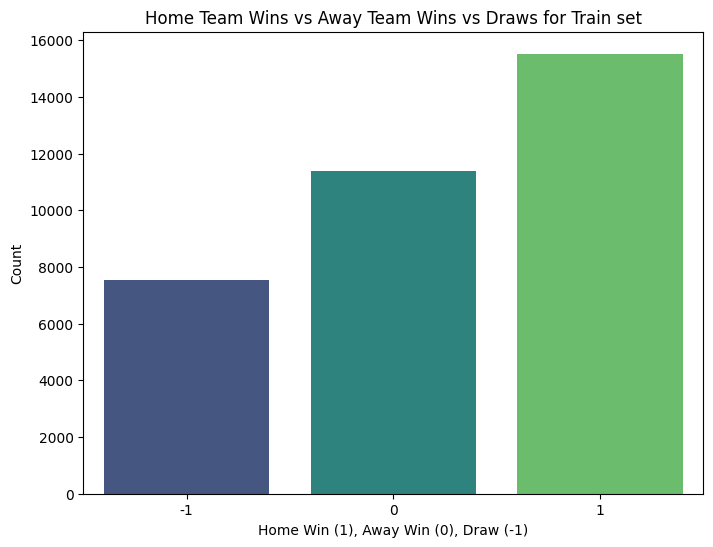

/tmp/ipykernel_338/1232104631.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')


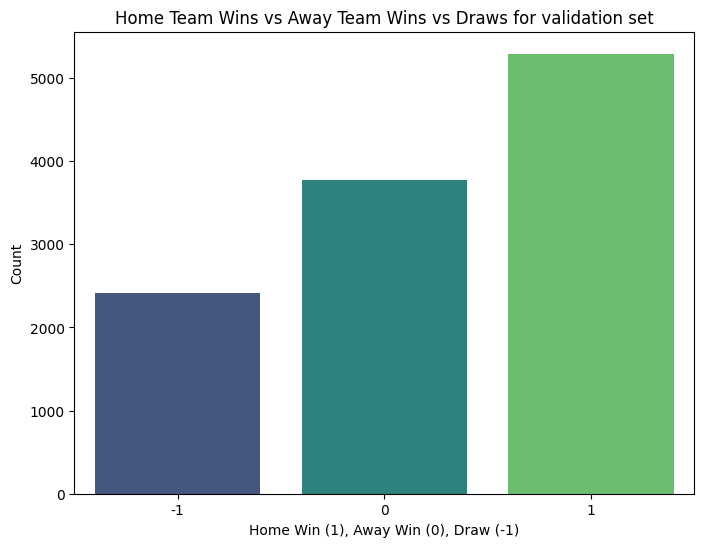

/tmp/ipykernel_338/1232104631.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')


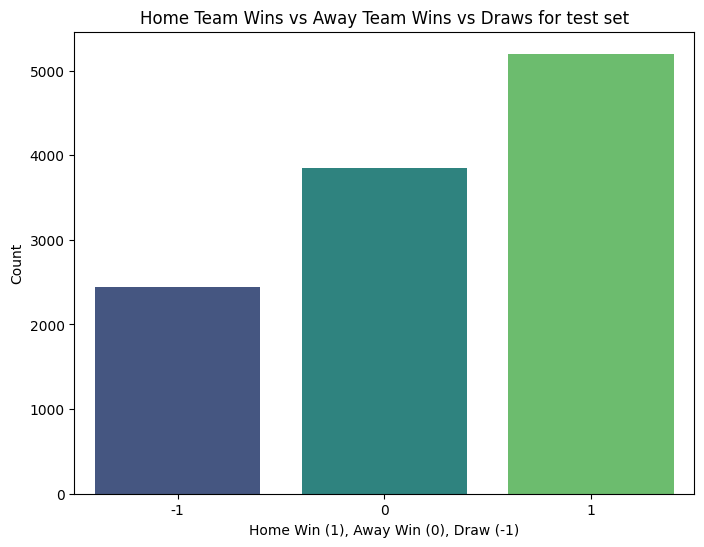

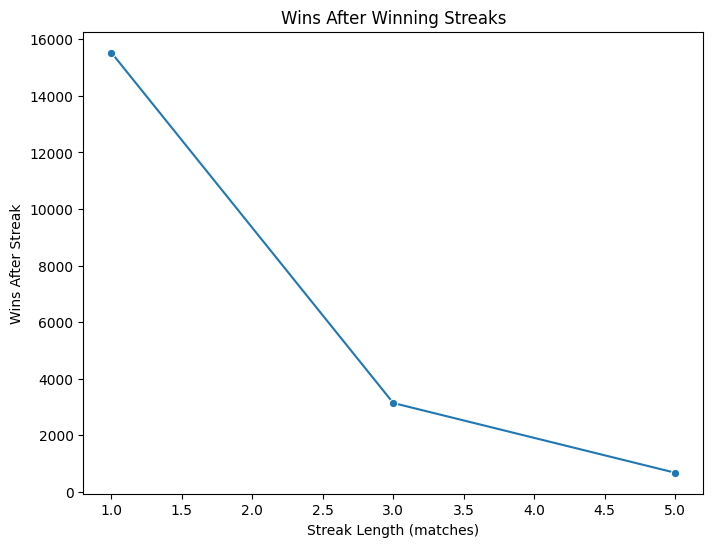

/tmp/ipykernel_338/1232104631.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Manager', y='Win Score', data=top_10_managers_df, palette='viridis')


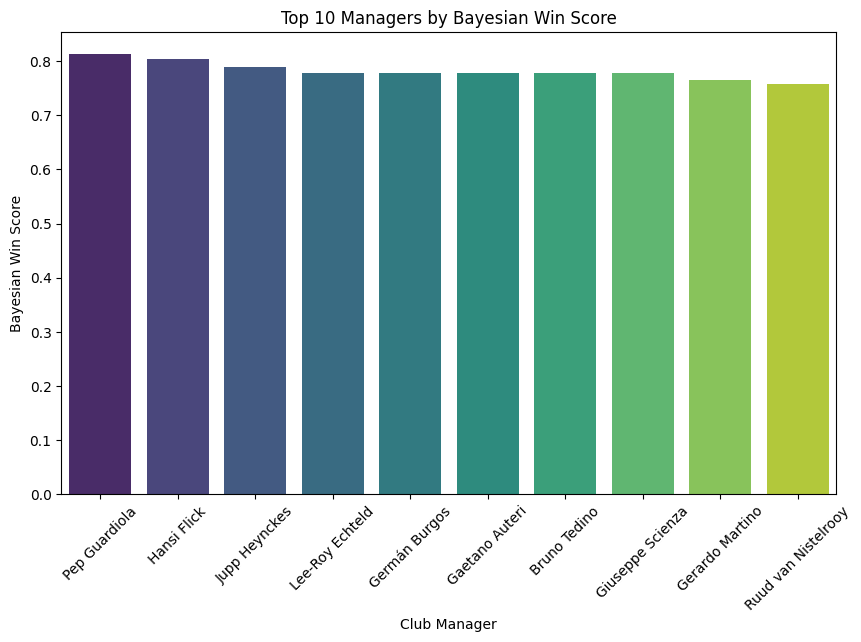

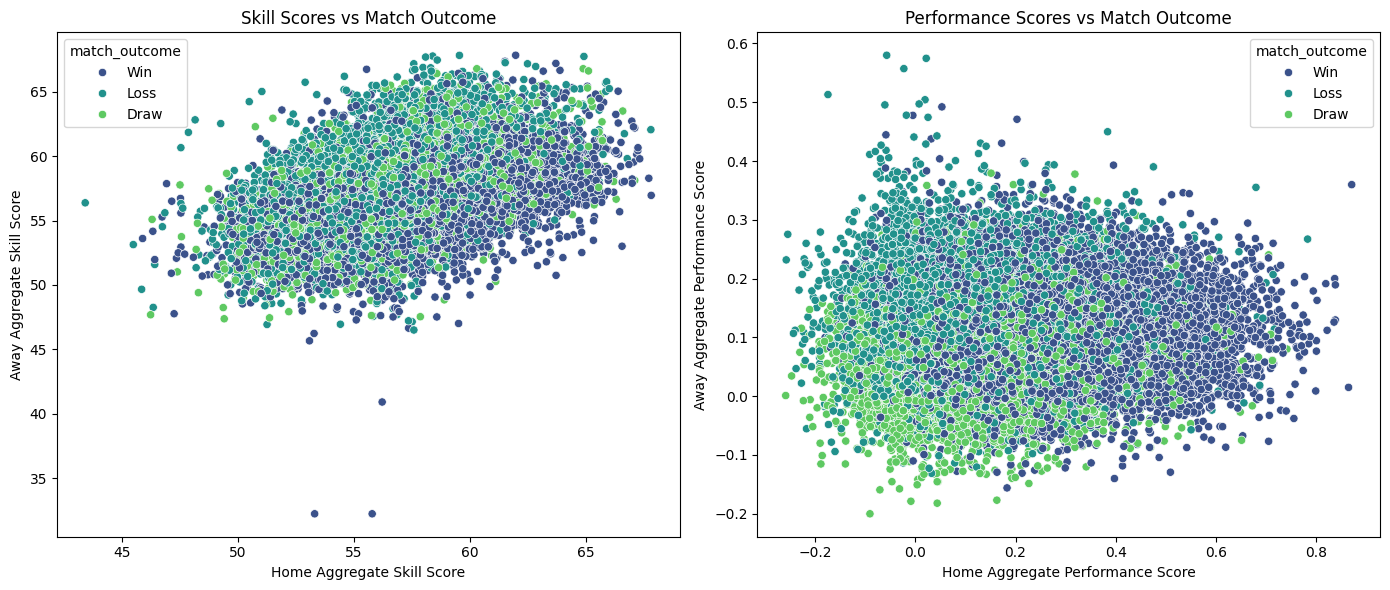

/tmp/ipykernel_338/1232104631.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_data['rest_days_bin'] = pd.cut(wins_data['rest_days_for_win'], bins=range(0, 50, 5), right=False)
/tmp/ipykernel_338/1232104631.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_counts.index.astype(str), y=wins_counts.values, palette='viridis')


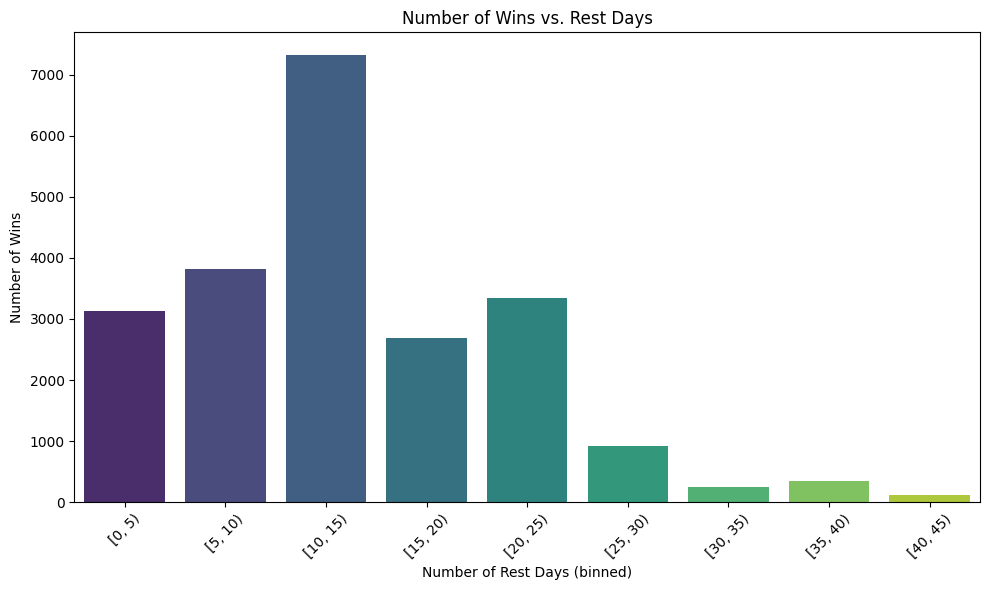

/tmp/ipykernel_338/1232104631.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_data['rest_days_bin'] = pd.cut(wins_data['rest_days_for_win'], bins=range(0, 16, 5), right=False)
/tmp/ipykernel_338/1232104631.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_counts.index.astype(str), y=wins_counts.values, palette='viridis')


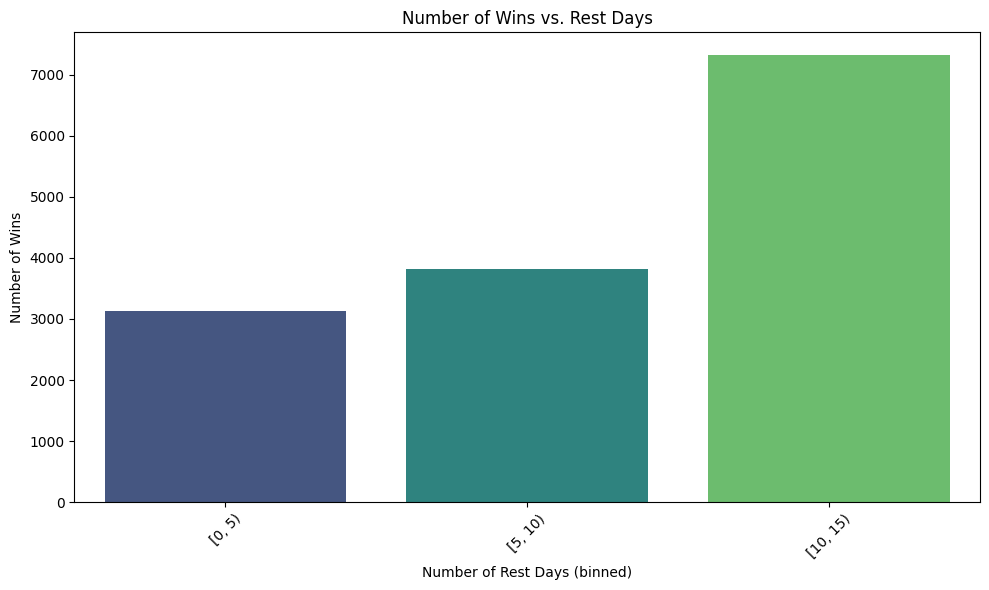

/tmp/ipykernel_338/1232104631.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wins_counts.index, y=wins_counts.values, palette='viridis')


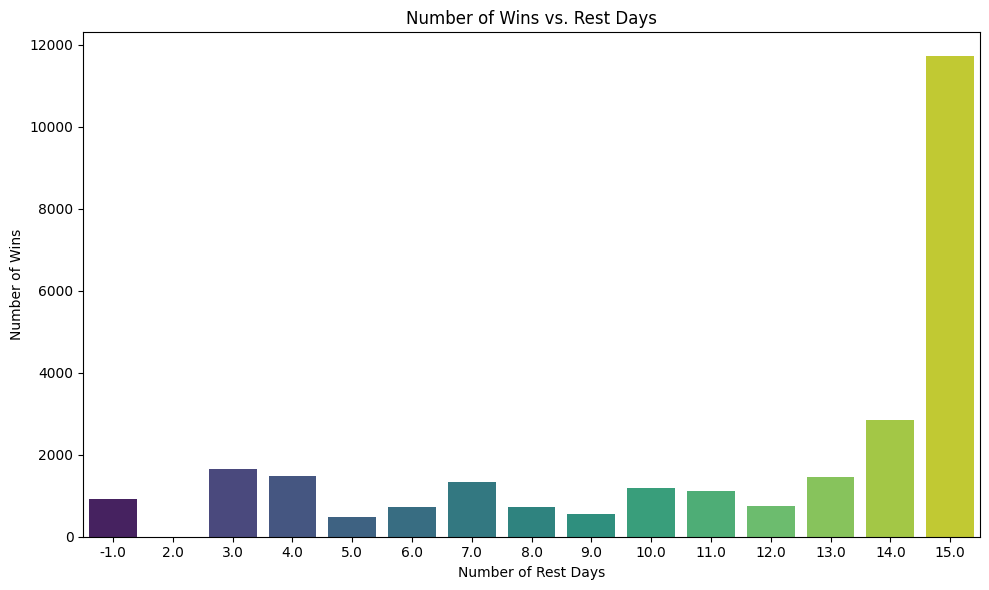

In [32]:
# 1. Instances that home team won vs. away team won vs. draw
win_counts = train_data["home_win"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette="viridis")
plt.title("Home Team Wins vs Away Team Wins vs Draws for Train set")
plt.xlabel("Home Win (1), Away Win (0), Draw (-1)")
plt.ylabel("Count")
plt.show()

win_counts = validation_data["home_win"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette="viridis")
plt.title("Home Team Wins vs Away Team Wins vs Draws for validation set")
plt.xlabel("Home Win (1), Away Win (0), Draw (-1)")
plt.ylabel("Count")
plt.show()

win_counts = test_data["home_win"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette="viridis")
plt.title("Home Team Wins vs Away Team Wins vs Draws for test set")
plt.xlabel("Home Win (1), Away Win (0), Draw (-1)")
plt.ylabel("Count")
plt.show()


# 2. Instances a team won given it won the last match, last 3 matches, and last 5 matches
def calculate_wins_after_streak(df, streak_length):
    df["win_streak"] = (
        df["home_win"]
        .rolling(streak_length)
        .apply(lambda x: all(x == 1), raw=True)
    )
    wins_after_streak = df[(df["win_streak"] == 1) & (df["home_win"] == 1)].shape[
        0
    ]
    return wins_after_streak


streak_lengths = [1, 3, 5]
wins_after_streaks = [
    calculate_wins_after_streak(train_data, sl) for sl in streak_lengths
]

plt.figure(figsize=(8, 6))
sns.lineplot(x=streak_lengths, y=wins_after_streaks, marker="o")
plt.title("Wins After Winning Streaks")
plt.xlabel("Streak Length (matches)")
plt.ylabel("Wins After Streak")
plt.show()

# 3. Number of wins for a club manager and raw probability
# Plot the win scores for the top 10 managers
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Manager", y="Win Score", data=top_10_managers_df, palette="viridis"
)
plt.title("Top 10 Managers by Bayesian Win Score")
plt.xlabel("Club Manager")
plt.ylabel("Bayesian Win Score")
plt.xticks(rotation=45)
plt.show()

# Assuming the data is in train_data DataFrame
# Reclassify match outcomes
train_data["match_outcome"] = train_data["home_win"].apply(
    lambda x: "Win" if x == 1 else ("Loss" if x == 0 else "Draw")
)

# 1. Scatter Plots for Skill Scores vs. Match Outcome
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(
    x="home_aggregate_skill_score",
    y="away_aggregate_skill_score",
    hue="match_outcome",
    data=train_data,
    palette="viridis",
)
plt.title("Skill Scores vs Match Outcome")
plt.xlabel("Home Aggregate Skill Score")
plt.ylabel("Away Aggregate Skill Score")

plt.subplot(1, 2, 2)
sns.scatterplot(
    x="home_aggregate_performance",
    y="away_aggregate_performance",
    hue="match_outcome",
    data=train_data,
    palette="viridis",
)
plt.title("Performance Scores vs Match Outcome")
plt.xlabel("Home Aggregate Performance Score")
plt.ylabel("Away Aggregate Performance Score")

plt.tight_layout()
plt.show()

# Rest days vs Wins.
# Create a new column to capture the appropriate rest days for wins
train_data["rest_days_for_win"] = np.where(
    train_data["home_win"] == 1,
    train_data["home_rest_days"],
    np.where(train_data["home_win"] == 0, train_data["away_rest_days"], np.nan),
)

# Apply the threshold of 45 days
train_data["rest_days_for_win"] = train_data["rest_days_for_win"].apply(
    lambda x: min(x, 50)
)

# Filter the data for wins only
wins_data = train_data[train_data["home_win"].isin([0, 1])]

# Create bins for rest days
wins_data["rest_days_bin"] = pd.cut(
    wins_data["rest_days_for_win"], bins=range(0, 50, 5), right=False
)

# Count the number of wins in each bin
wins_counts = wins_data["rest_days_bin"].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(
    x=wins_counts.index.astype(str), y=wins_counts.values, palette="viridis"
)
plt.title("Number of Wins vs. Rest Days")
plt.xlabel("Number of Rest Days (binned)")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create a new column to capture the appropriate rest days for wins
train_data["rest_days_for_win"] = np.where(
    train_data["home_win"] == 1,
    train_data["home_rest_days"],
    np.where(train_data["home_win"] == 0, train_data["away_rest_days"], np.nan),
)

# Apply the threshold of 45 days
train_data["rest_days_for_win"] = train_data["rest_days_for_win"].apply(
    lambda x: min(x, 15)
)

# Filter the data for wins only
wins_data = train_data[train_data["home_win"].isin([0, 1])]

# Create bins for rest days
wins_data["rest_days_bin"] = pd.cut(
    wins_data["rest_days_for_win"], bins=range(0, 16, 5), right=False
)

# Count the number of wins in each bin
wins_counts = wins_data["rest_days_bin"].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(
    x=wins_counts.index.astype(str), y=wins_counts.values, palette="viridis"
)
plt.title("Number of Wins vs. Rest Days")
plt.xlabel("Number of Rest Days (binned)")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create a new column to capture the appropriate rest days for wins
train_data["rest_days_for_win"] = np.where(
    train_data["home_win"] == 1,
    train_data["home_rest_days"],
    np.where(train_data["home_win"] == 0, train_data["away_rest_days"], np.nan),
)

# Apply the threshold of 15 days
train_data["rest_days_for_win"] = train_data["rest_days_for_win"].apply(
    lambda x: min(x, 15)
)

# Filter the data for wins only
wins_data = train_data[train_data["home_win"].isin([0, 1])]

# Count the number of wins for each rest day
wins_counts = wins_data["rest_days_for_win"].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=wins_counts.index, y=wins_counts.values, palette="viridis")
plt.title("Number of Wins vs. Rest Days")
plt.xlabel("Number of Rest Days")
plt.ylabel("Number of Wins")
plt.tight_layout()
plt.show()

# Baseline Model

In [22]:
columns = [
    "home_club_id",
    "away_club_id",
    "home_aggregate_skill_score",
    "away_aggregate_skill_score",
    "home_aggregate_performance",
    "away_aggregate_performance",
    "home_manager_score",
    "away_manager_score",
    "home_head_head_prob",
]
X_train = train_data[columns]
y_train = train_data["home_win"]
X_val = validation_data[columns]
y_val = validation_data["home_win"]
X_test = test_data[columns]
y_test = test_data["home_win"]

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (34463, 9)
Validation data shape: (11488, 9)
Test data shape: (11488, 9)


In [38]:
# Identify the numeric columns for normalization
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
# Normalize the numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Define the Logistic Regression model
model = LogisticRegression(
    multi_class="multinomial", max_iter=1000, solver="lbfgs"
)

# Define hyperparameter grid for tuning
param_grid = {"C": [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Train the model with the best parameters on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)
y_val_pred_prob = best_model.predict_proba(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="weighted")
val_roc_auc = roc_auc_score(y_val, y_val_pred_prob, multi_class="ovr")

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC AUC Score: {val_roc_auc:.4f}")
print(classification_report(y_val, y_val_pred))

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average="weighted")
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob, multi_class="ovr")

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")
print(classification_report(y_test, y_test_pred))

/tmp/ipykernel_180/1734992820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
/tmp/ipykernel_180/1734992820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
/tmp/ipykernel_180/1734992820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Best parameters: {'C': 0.1}
Validation Accuracy: 0.5776
Validation F1 Score: 0.5636
Validation ROC AUC Score: 0.7351
              precision    recall  f1-score   support

          -1       0.48      0.28      0.35      2459
           0       0.55      0.56      0.56      3796
           1       0.62      0.73      0.67      5233

    accuracy                           0.58     11488
   macro avg       0.55      0.52      0.53     11488
weighted avg       0.57      0.58      0.56     11488

Test Accuracy: 0.5668
Test F1 Score: 0.5529
Test ROC AUC Score: 0.7296
              precision    recall  f1-score   support

          -1       0.47      0.27      0.34      2505
           0       0.54      0.55      0.55      3812
           1       0.61      0.72      0.66      5171

    accuracy                           0.57     11488
   macro avg       0.54      0.52      0.52     11488
weighted avg       0.55      0.57      0.55     11488

